<h1>Twitter Sentiment Analysis with Random Forest</h1><br>
<h2>What is Sentiment Analysis?</h2>
<p>The process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.</p>
<img src="images/tsa.jpg" width="500" height="300"><br><br>
<h2>Dataset</h2>
<ul>
    <li><a href="https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/blob/master/twitter_sentiment.csv">twitter_sentiment.csv</a></li>
    <li><a href="https://github.com/laxmimerit/preprocess_kgptalkie">https://github.com/laxmimerit/preprocess_kgptalkie</a></li>
</ul>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [7]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\shyam kumar\appdata\local\temp\pip-req-build-7qltwbz8
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7667 sha256=94fab48bfefd4d6436b5f51beeb0626af463da0bbd8cf223e15a7e896d10c665
  Stored in directory: C:\Users\Shyam Kumar\AppData\Local\Temp\pip-ephem-wheel-cache-naxsdh84\wheels\74\fe\05\0d013c54ae5e4afb77c6c480378063827c84f57ea5f554e072
Successfully built preprocess-kgptalkie


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\Shyam Kumar\AppData\Local\Temp\pip-req-build-7qltwbz8'


In [6]:
df = pd.read_csv('twitter_sentiment.csv', header=None, index_col=0)
df.head()

,1,2,3
0,,,
id,label,status,tweet
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...


In [7]:
df.head()

,1,2,3
0,,,
id,label,status,tweet
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...


In [8]:
df = df[[2,3]].reset_index(drop=True)

In [9]:
df

,2,3
0,status,tweet
1,Positive,im getting on borderlands and i will murder yo...
2,Positive,I am coming to the borders and I will kill you...
3,Positive,im getting on borderlands and i will kill you ...
4,Positive,im coming on borderlands and i will murder you...
...,...,...
75678,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75679,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75680,Positive,Today sucked so it’s time to drink wine n play...
75681,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
df.columns = ['sentiment', 'text']
df.head(3)

,sentiment,text
0,status,tweet
1,Positive,im getting on borderlands and i will murder yo...
2,Positive,I am coming to the borders and I will kill you...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75683 entries, 0 to 75682
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75683 non-null  object
 1   text       74997 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [19]:
df.isnull().sum()
df.dropna(inplace=True)

In [20]:
sum(df['text'].apply(len)>5), sum(df['text'].apply(len)<=5)

(72883, 2114)

In [21]:
print(df.shape)
df = df[df['text'].apply(len)>5]
print(df.shape)

(74997, 2)
(72883, 2)


In [23]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

In [24]:
import preprocess_kgptalkie as ps

df.columns

Index(['sentiment', 'text'], dtype='object')

In [25]:
df = ps.get_basic_features(df)

In [26]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

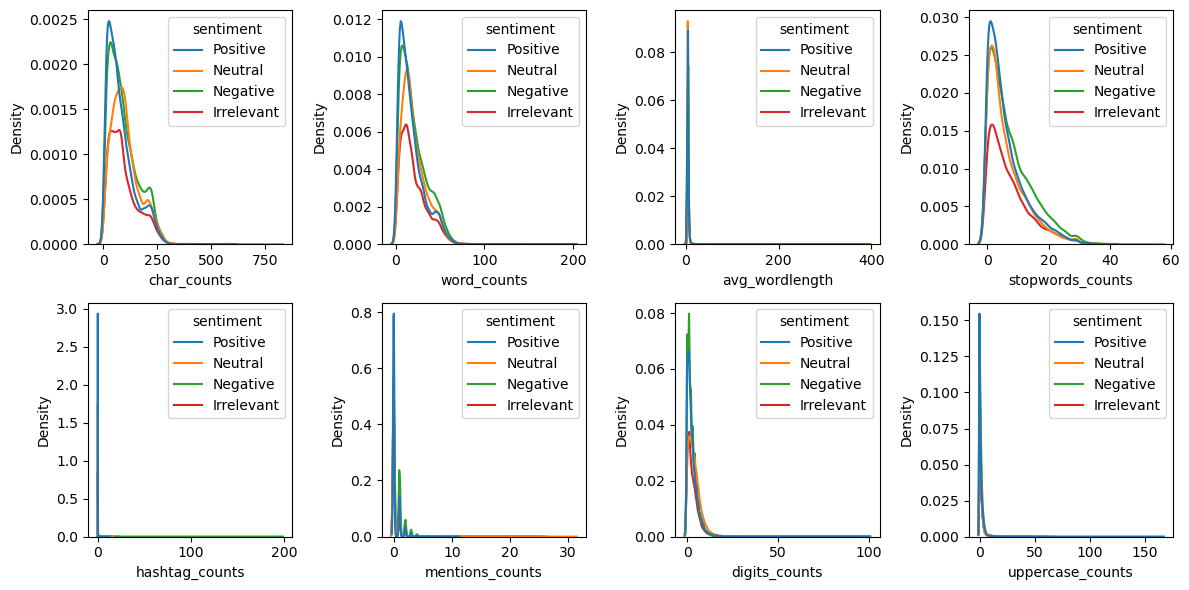

In [32]:
df.head()

#hashtags, @mention, 123, UPPER

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
num_cols = df.select_dtypes(include = 'number').columns

for index, col in enumerate(num_cols):
    plt.subplot(2, 4, index+1)
    sns.kdeplot(data = df, x=col, hue='sentiment', fill=False)

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

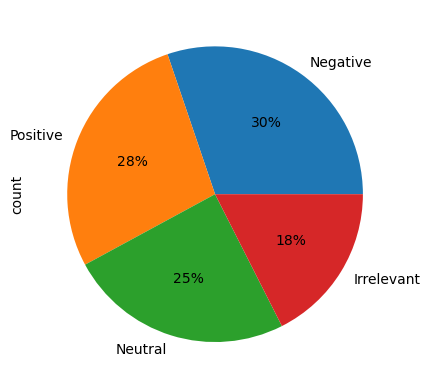

In [33]:
df['sentiment'].value_counts().plot(kind='pie', autopct="%1.0f%%")

In [34]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

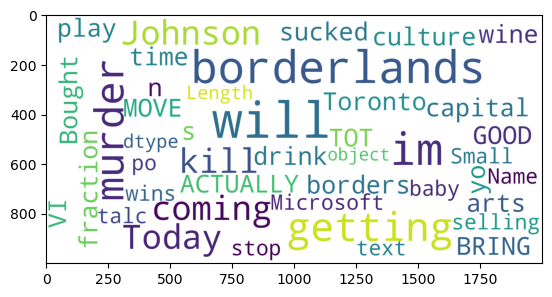

In [36]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords,
                     max_words=300, max_font_size=40, scale=5
                     ).generate(str(df['text']))

plt.imshow(wordcloud)

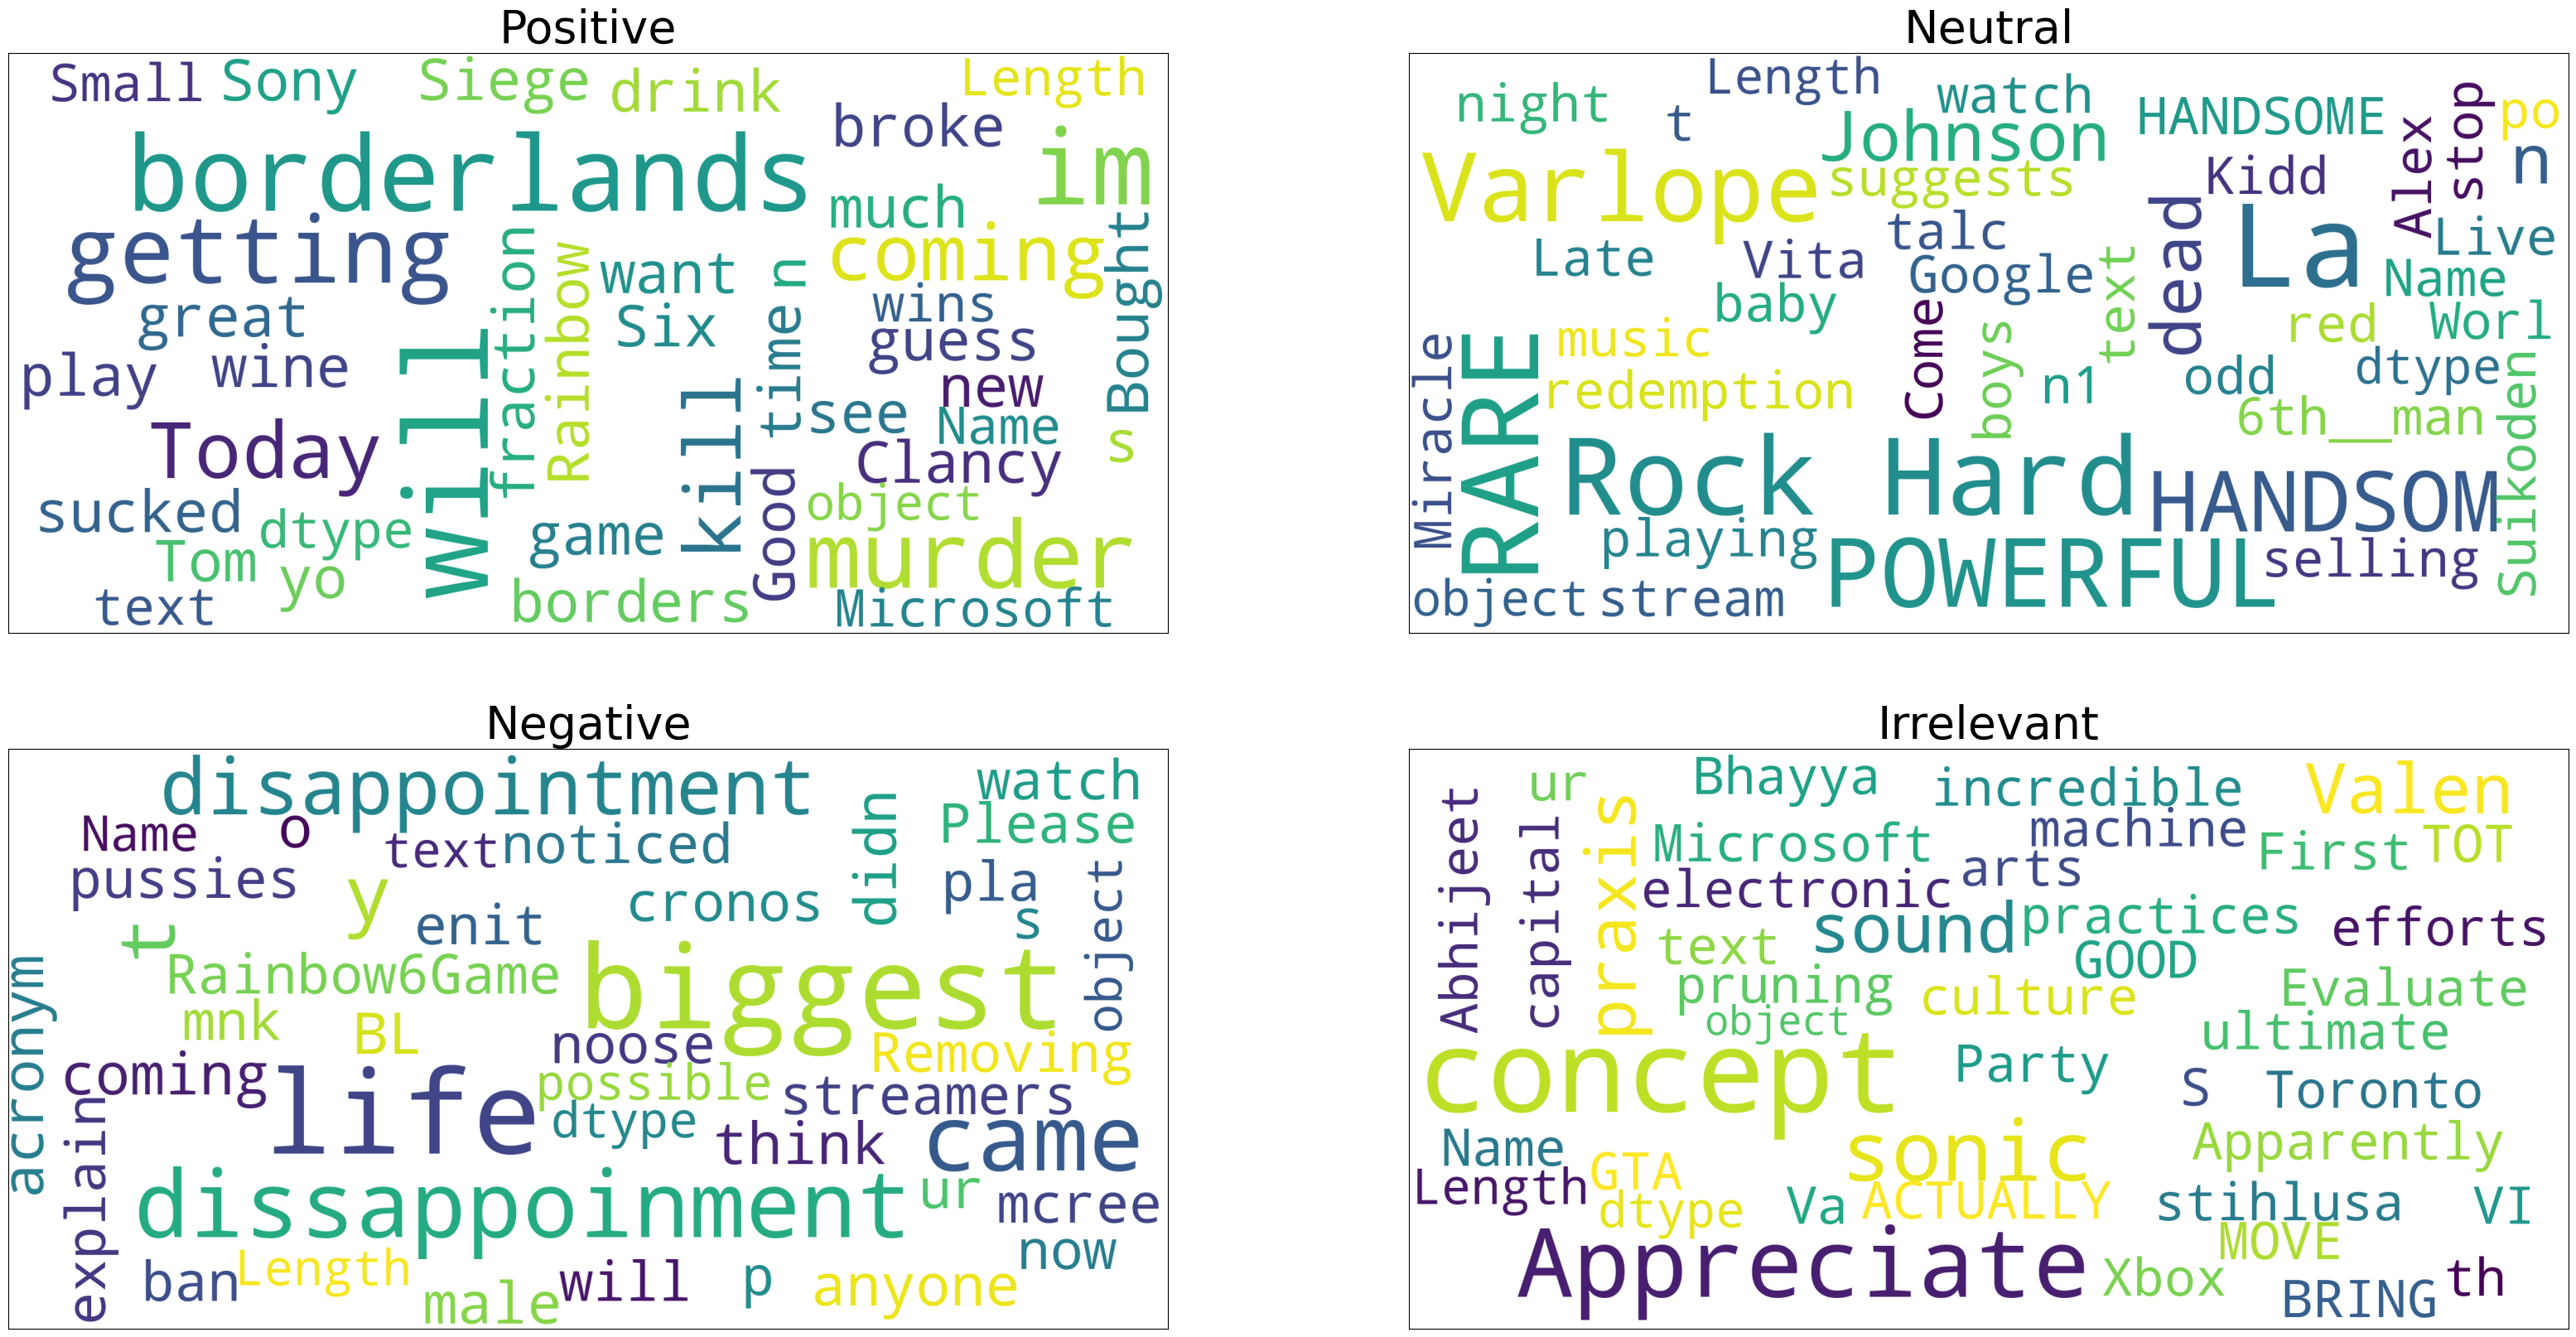

In [38]:
plt.figure(figsize=(40,20))

for index,sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2, 2, index+1)
    
    data = df[df['sentiment']==sent]['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords,
                     max_words=300, max_font_size=40, scale=5
                     ).generate(str(data))
    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent, fontsize=40)

### data cleaning

In [40]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))

In [42]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],
                                                   df['sentiment'],
                                                    test_size=0.2,
                                                   random_state=0)

In [43]:
X_train.shape, X_test.shape

((58306,), (14577,))

### Model Building and Testing

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


In [51]:
clf = Pipeline([('tfid',TfidfVectorizer()), 
                ('rfc', RandomForestClassifier(n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [52]:
# evaluation
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.86      0.91      2561
    Negative       0.92      0.96      0.94      4481
     Neutral       0.93      0.91      0.92      3553
    Positive       0.90      0.94      0.92      3982

    accuracy                           0.93     14577
   macro avg       0.93      0.92      0.92     14577
weighted avg       0.93      0.93      0.92     14577



In [60]:
import pickle
pickle.dump(clf, open("twitter_sentiment.pkl", "wb"))

In [61]:
clf.predict(["I am Innocent"])

array(['Negative'], dtype=object)

In [62]:
clf.predict(["I go there"])

array(['Neutral'], dtype=object)